In [27]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('nba.csv')

In [29]:
# Season Totals
season_totals = df.groupby(['SEASON']).agg(
    SHOTS=('SHOT_TYPE', 'count'),
    TWO_PT_COUNT=('SHOT_TYPE', lambda x: (x == '2PT Field Goal').sum()),
    TWO_PT_MADE=('SHOT_MADE', lambda x: ((df['SHOT_TYPE'] == '2PT Field Goal') & (x == True)).sum()),
    THREE_PT_COUNT=('SHOT_TYPE', lambda x: (x == '3PT Field Goal').sum()),
    THREE_PT_MADE=('SHOT_MADE', lambda x: ((df['SHOT_TYPE'] == '3PT Field Goal') & (x == True)).sum()),
    AVG_SHOT_DISTANCE=('SHOT_DISTANCE', 'mean')
).reset_index()

season_totals.rename(columns={'SEASON': 'Season', 'SHOTS': 'Shots' , 'TWO_PT_COUNT': '2 Pointers', 'TWO_PT_MADE': '2 Pointers Made', 'THREE_PT_COUNT': '3 Pointers', 'THREE_PT_MADE': '3 Pointers Made', 'AVG_SHOT_DISTANCE': 'Average Shot Distance'}, inplace=True)
season_totals

,Season,Shots,2 Pointers,2 Pointers Made,3 Pointers,3 Pointers Made,Average Shot Distance
0,2003-04,189803,154310,70933,35493,12322,11.595955
1,2004-05,197626,158878,74658,38748,13777,11.744102
2,2005-06,194314,155001,74080,39313,14086,11.787442
3,2006-07,196072,154401,74934,41671,14926,11.823580
4,2007-08,200501,155957,75545,44544,16124,12.148333
5,2008-09,199030,154471,74958,44559,16344,12.014892
6,2009-10,200966,156367,76908,44599,15812,11.846472
7,2010-11,199761,155477,75738,44284,15875,12.135647
8,2011-12,161205,124830,59525,36375,12682,12.059812
9,2012-13,201579,152542,73679,49037,17596,12.158762


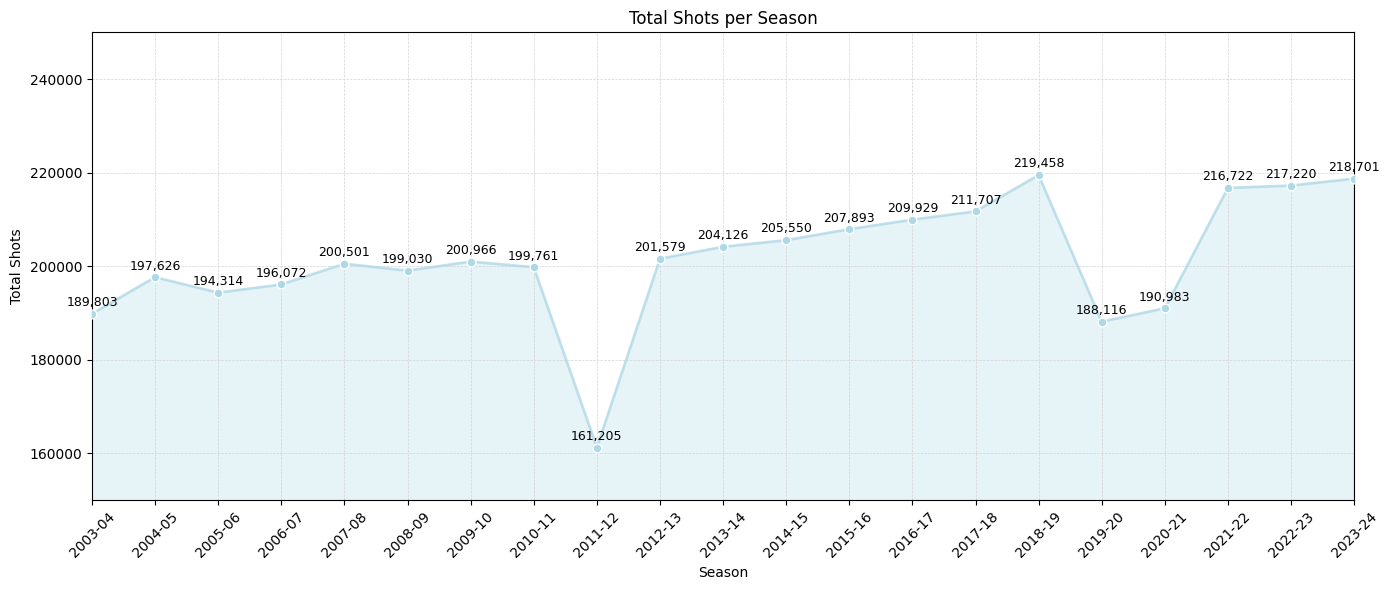

In [30]:
season_shot_stats = df.groupby('SEASON').agg(
    TOTAL_SHOTS=('SHOT_TYPE', 'count')
).reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='SEASON', y='TOTAL_SHOTS', data=season_shot_stats, 
             color='lightblue', linewidth=2, alpha=0.7)
plt.fill_between(season_shot_stats['SEASON'], 
                 season_shot_stats['TOTAL_SHOTS'], 
                 color='lightblue', alpha=0.3)
plt.title('Total Shots per Season', fontsize=12)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Total Shots', fontsize=10)
plt.xticks(rotation=45)
plt.ylim(150000, 250000)
plt.xlim(season_shot_stats['SEASON'].min(), season_shot_stats['SEASON'].max())
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

for i in range(len(season_shot_stats)):
    plt.text(season_shot_stats['SEASON'].iloc[i], 
             season_shot_stats['TOTAL_SHOTS'].iloc[i] + 1000,
             f"{season_shot_stats['TOTAL_SHOTS'].iloc[i]:,}",
             fontsize=9, ha='center', va='bottom', color='black')
    
    plt.scatter(season_shot_stats['SEASON'].iloc[i], 
                season_shot_stats['TOTAL_SHOTS'].iloc[i], 
                color='lightblue', s=40, edgecolor='white', zorder=3)

plt.tight_layout()
plt.show()

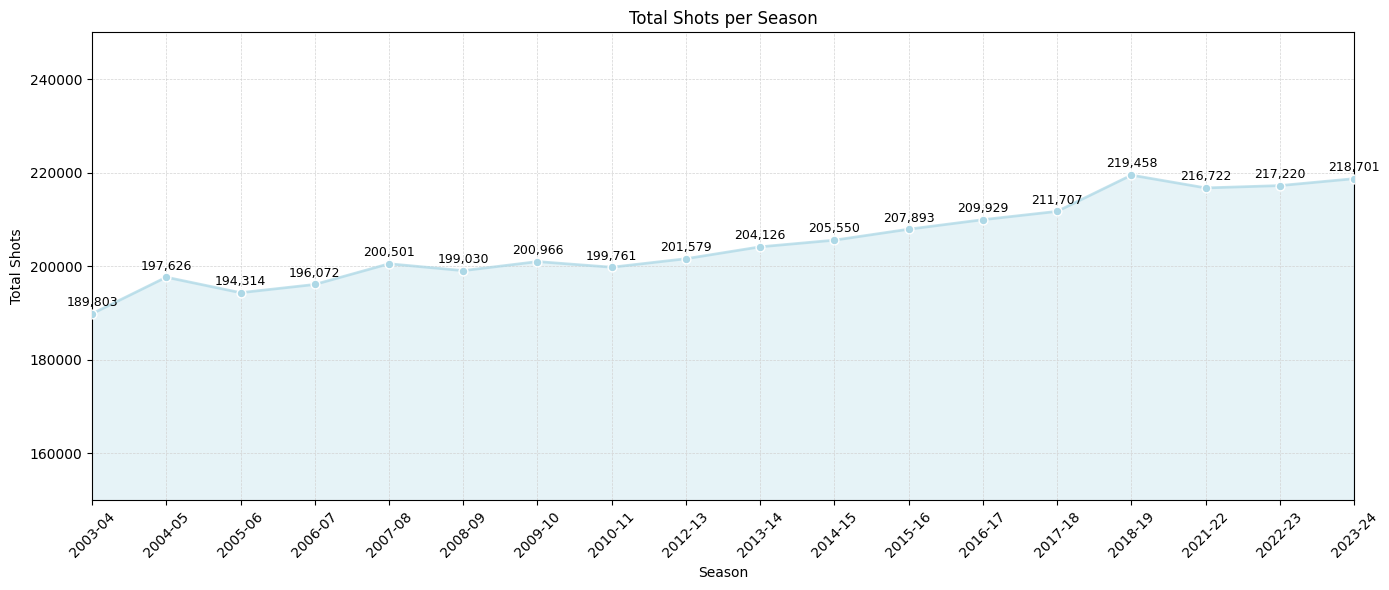

In [31]:
# Exclude Outliers (Pandemic and NBA lockout)
exclude_seasons = ['2011-12', '2019-20', '2020-21']
season_shot_stats_filtered = season_shot_stats[~season_shot_stats['SEASON'].isin(exclude_seasons)]

plt.figure(figsize=(14, 6))
sns.lineplot(x='SEASON', y='TOTAL_SHOTS', data=season_shot_stats_filtered, 
             color='lightblue', linewidth=2, alpha=0.7)
plt.fill_between(season_shot_stats_filtered['SEASON'], 
                 season_shot_stats_filtered['TOTAL_SHOTS'], 
                 color='lightblue', alpha=0.3)
plt.title('Total Shots per Season', fontsize=12)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Total Shots', fontsize=10)
plt.xticks(rotation=45)
plt.ylim(150000, 250000)
plt.xlim(season_shot_stats_filtered['SEASON'].min(), season_shot_stats_filtered['SEASON'].max())
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)  

for i in range(len(season_shot_stats_filtered)):
    plt.text(season_shot_stats_filtered['SEASON'].iloc[i], 
             season_shot_stats_filtered['TOTAL_SHOTS'].iloc[i] + 1000,  
             f"{season_shot_stats_filtered['TOTAL_SHOTS'].iloc[i]:,}",  
             fontsize=9, ha='center', va='bottom', color='black')
    
    plt.scatter(season_shot_stats_filtered['SEASON'].iloc[i], 
                season_shot_stats_filtered['TOTAL_SHOTS'].iloc[i], 
                color='lightblue', s=40, edgecolor='white', zorder=3)

plt.tight_layout()
plt.show()

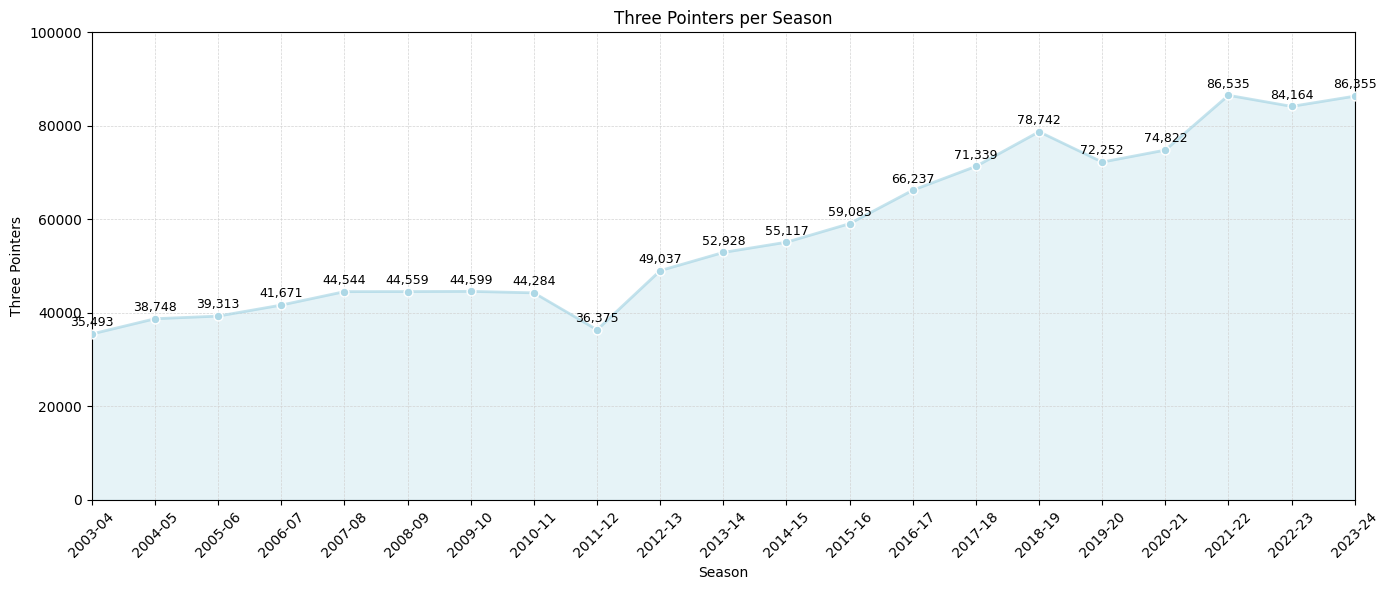

In [32]:
season_shot_stats = df.groupby('SEASON').agg(
    THREE_PT=('SHOT_TYPE', lambda x: (x == '3PT Field Goal').sum())  
).reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='SEASON', y='THREE_PT', data=season_shot_stats, 
             color='lightblue', linewidth=2, alpha=0.7)
plt.fill_between(season_shot_stats['SEASON'], 
                 season_shot_stats['THREE_PT'], 
                 color='lightblue', alpha=0.3)
plt.title('Three Pointers per Season', fontsize=12)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Three Pointers', fontsize=10)
plt.xticks(rotation=45)
plt.ylim(0, 100000)
plt.xlim(season_shot_stats['SEASON'].min(), season_shot_stats['SEASON'].max())
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)  

for i in range(len(season_shot_stats)):
    plt.text(season_shot_stats['SEASON'].iloc[i], 
             season_shot_stats['THREE_PT'].iloc[i] + 1000,  
             f"{season_shot_stats['THREE_PT'].iloc[i]:,}", 
             fontsize=9, ha='center', va='bottom', color='black')
    
    plt.scatter(season_shot_stats['SEASON'].iloc[i], 
                season_shot_stats['THREE_PT'].iloc[i], 
                color='lightblue', s=40, edgecolor='white', zorder=3)  
plt.tight_layout()
plt.show()

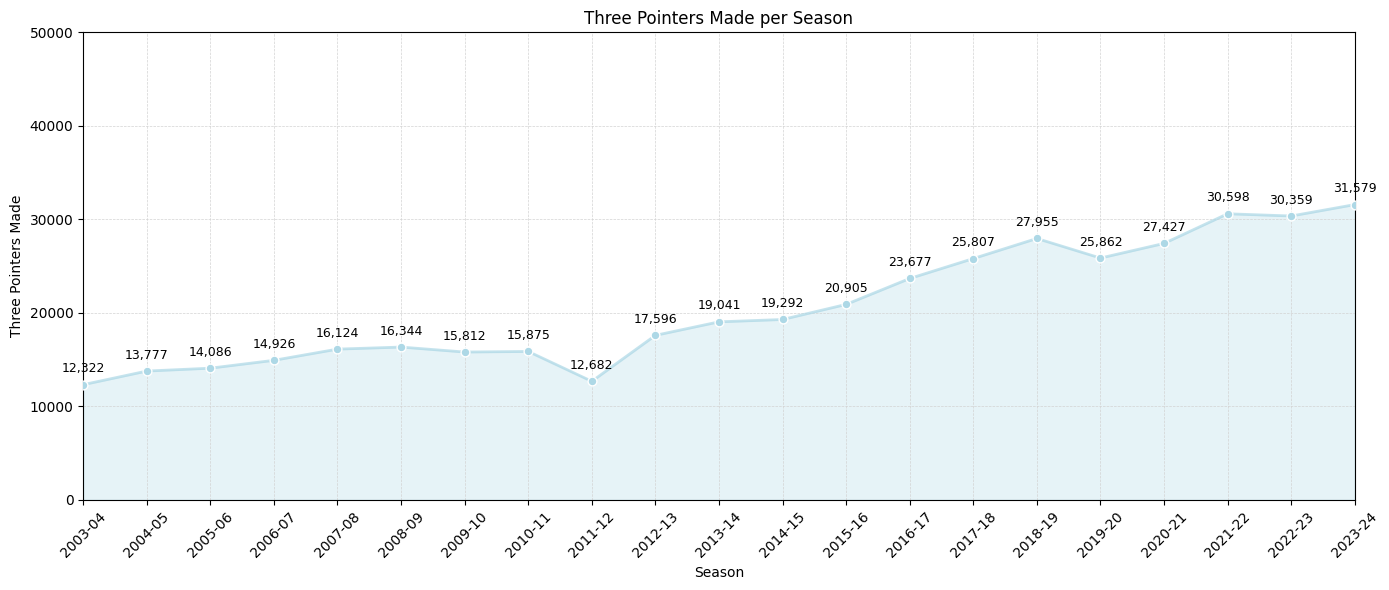

In [33]:
season_shot_stats = df.groupby('SEASON').agg(
    THREE_PT_MADE=('SHOT_MADE', lambda x: ((df['SHOT_TYPE'] == '3PT Field Goal') & (x == True)).sum())  
).reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='SEASON', y='THREE_PT_MADE', data=season_shot_stats, 
             color='lightblue', linewidth=2, alpha=0.7)
plt.fill_between(season_shot_stats['SEASON'], 
                 season_shot_stats['THREE_PT_MADE'], 
                 color='lightblue', alpha=0.3)
plt.title('Three Pointers Made per Season', fontsize=12)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Three Pointers Made', fontsize=10)
plt.xticks(rotation=45)
plt.ylim(0, 50000)
plt.xlim(season_shot_stats['SEASON'].min(), season_shot_stats['SEASON'].max())
plt.grid(color='lightgray', linestyle='--', linewidth=0.5) 

for i in range(len(season_shot_stats)):
    plt.text(season_shot_stats['SEASON'].iloc[i], 
             season_shot_stats['THREE_PT_MADE'].iloc[i] + 1000,
             f"{season_shot_stats['THREE_PT_MADE'].iloc[i]:,}",
             fontsize=9, ha='center', va='bottom', color='black')
    
    plt.scatter(season_shot_stats['SEASON'].iloc[i], 
                season_shot_stats['THREE_PT_MADE'].iloc[i], 
                color='lightblue', s=40, edgecolor='white', zorder=3)

plt.tight_layout()
plt.show()

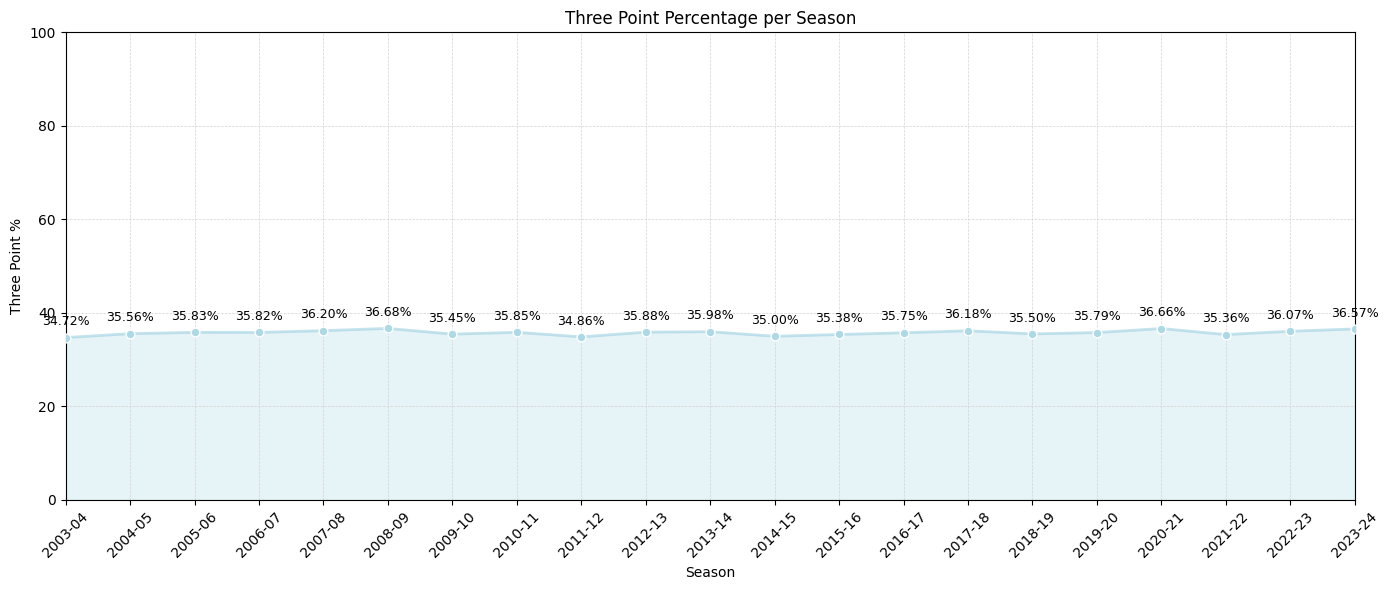

In [34]:
season_shot_stats = df.groupby('SEASON').agg(
    TOTAL_THREE_PT=('SHOT_TYPE', lambda x: (x == '3PT Field Goal').sum()),
    THREE_PT_MADE=('SHOT_MADE', lambda x: ((df['SHOT_TYPE'] == '3PT Field Goal') & (x == True)).sum())
).reset_index()

season_shot_stats['THREE_PT_PERCENTAGE'] = (season_shot_stats['THREE_PT_MADE'] / 
                                            season_shot_stats['TOTAL_THREE_PT']) * 100

plt.figure(figsize=(14, 6))
sns.lineplot(x='SEASON', y='THREE_PT_PERCENTAGE', data=season_shot_stats, 
             color='lightblue', linewidth=2, alpha=0.7)
plt.fill_between(season_shot_stats['SEASON'], 
                 season_shot_stats['THREE_PT_PERCENTAGE'], 
                 color='lightblue', alpha=0.3)
plt.title('Three Point Percentage per Season', fontsize=12)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Three Point %', fontsize=10)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.xlim(season_shot_stats['SEASON'].min(), season_shot_stats['SEASON'].max())
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

for i in range(len(season_shot_stats)):
    plt.text(season_shot_stats['SEASON'].iloc[i], 
             season_shot_stats['THREE_PT_PERCENTAGE'].iloc[i] + 2,  
             f"{season_shot_stats['THREE_PT_PERCENTAGE'].iloc[i]:.2f}%", 
             fontsize=9, ha='center', va='bottom', color='black')
    
    plt.scatter(season_shot_stats['SEASON'].iloc[i], 
                season_shot_stats['THREE_PT_PERCENTAGE'].iloc[i], 
                color='lightblue', s=40, edgecolor='white', zorder=3)

plt.tight_layout()
plt.show()

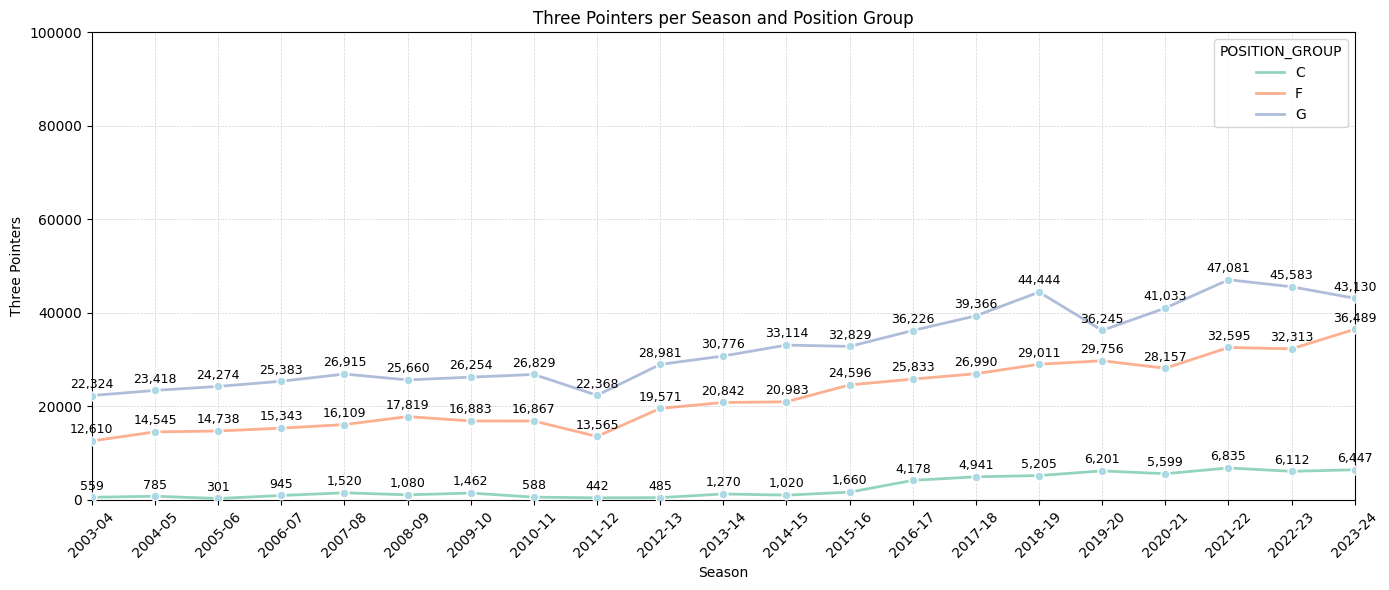

In [35]:
season_position_shot_stats = df.groupby(['SEASON', 'POSITION_GROUP']).agg(
    THREE_PT=('SHOT_TYPE', lambda x: (x == '3PT Field Goal').sum()) 
).reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='SEASON', y='THREE_PT', hue='POSITION_GROUP', data=season_position_shot_stats, 
             palette='Set2', linewidth=2, alpha=0.7)
plt.title('Three Pointers per Season and Position Group', fontsize=12)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Three Pointers', fontsize=10)
plt.xticks(rotation=45)
plt.ylim(0, 100000)
plt.xlim(season_position_shot_stats['SEASON'].min(), season_position_shot_stats['SEASON'].max())
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)  

for i in range(len(season_position_shot_stats)):
    plt.text(season_position_shot_stats['SEASON'].iloc[i], 
             season_position_shot_stats['THREE_PT'].iloc[i] + 1000,  
             f"{season_position_shot_stats['THREE_PT'].iloc[i]:,}", 
             fontsize=9, ha='center', va='bottom', color='black')
    
    plt.scatter(season_position_shot_stats['SEASON'].iloc[i], 
                season_position_shot_stats['THREE_PT'].iloc[i], 
                color='lightblue', s=40, edgecolor='white', zorder=3) 

plt.tight_layout()
plt.show()

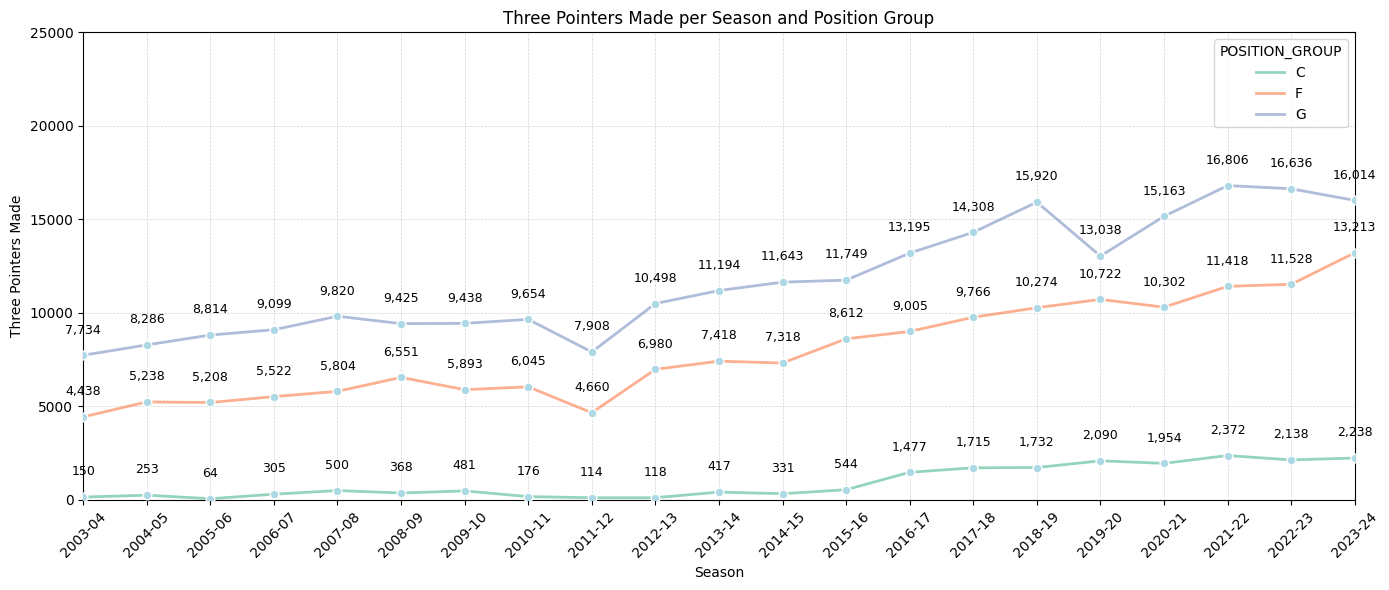

In [36]:
season_position_shot_stats = df.groupby(['SEASON', 'POSITION_GROUP']).agg(
THREE_PT_MADE=('SHOT_MADE', lambda x: ((df['SHOT_TYPE'] == '3PT Field Goal') & (x == True)).sum())  
).reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='SEASON', y='THREE_PT_MADE', hue='POSITION_GROUP', data=season_position_shot_stats, 
             palette='Set2', linewidth=2, alpha=0.7)
plt.title('Three Pointers Made per Season and Position Group', fontsize=12)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Three Pointers Made', fontsize=10)
plt.xticks(rotation=45)
plt.ylim(0, 25000)
plt.xlim(season_position_shot_stats['SEASON'].min(), season_position_shot_stats['SEASON'].max())
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

for i in range(len(season_position_shot_stats)):
    plt.text(season_position_shot_stats['SEASON'].iloc[i], 
             season_position_shot_stats['THREE_PT_MADE'].iloc[i] + 1000, 
             f"{season_position_shot_stats['THREE_PT_MADE'].iloc[i]:,}", 
             fontsize=9, ha='center', va='bottom', color='black')
    
    plt.scatter(season_position_shot_stats['SEASON'].iloc[i], 
                season_position_shot_stats['THREE_PT_MADE'].iloc[i], 
                color='lightblue', s=40, edgecolor='white', zorder=3)  

plt.tight_layout()
plt.show()

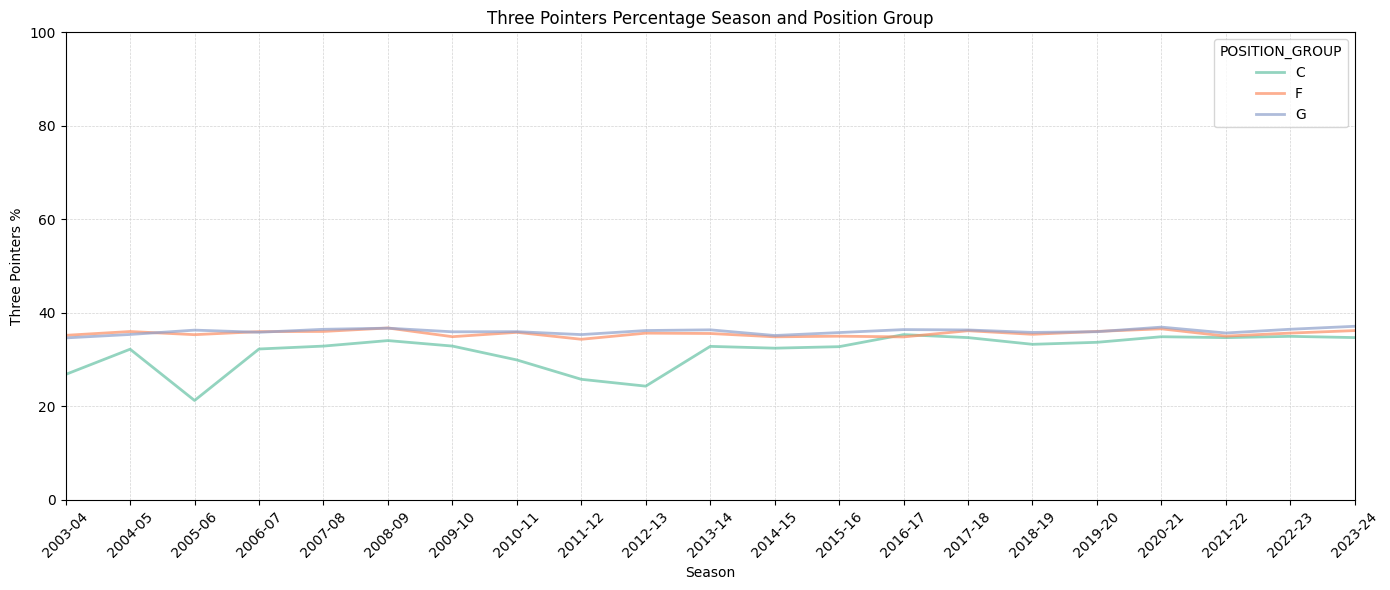

In [37]:
season_position_shot_stats = df.groupby(['SEASON', 'POSITION_GROUP']).agg(
    TOTAL_THREE_PT=('SHOT_TYPE', lambda x: (x == '3PT Field Goal').sum()),
    THREE_PT_MADE=('SHOT_MADE', lambda x: ((df['SHOT_TYPE'] == '3PT Field Goal') & (x == True)).sum())
).reset_index()

season_position_shot_stats['THREE_PT_PERCENTAGE'] = (season_position_shot_stats['THREE_PT_MADE'] / 
                                                     season_position_shot_stats['TOTAL_THREE_PT']) * 100

plt.figure(figsize=(14, 6))
sns.lineplot(x='SEASON', y='THREE_PT_PERCENTAGE', hue='POSITION_GROUP', data=season_position_shot_stats, 
             palette='Set2', linewidth=2, alpha=0.7)
plt.title('Three Pointers Percentage Season and Position Group', fontsize=12)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Three Pointers %', fontsize=10)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.xlim(season_position_shot_stats['SEASON'].min(), season_position_shot_stats['SEASON'].max())
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

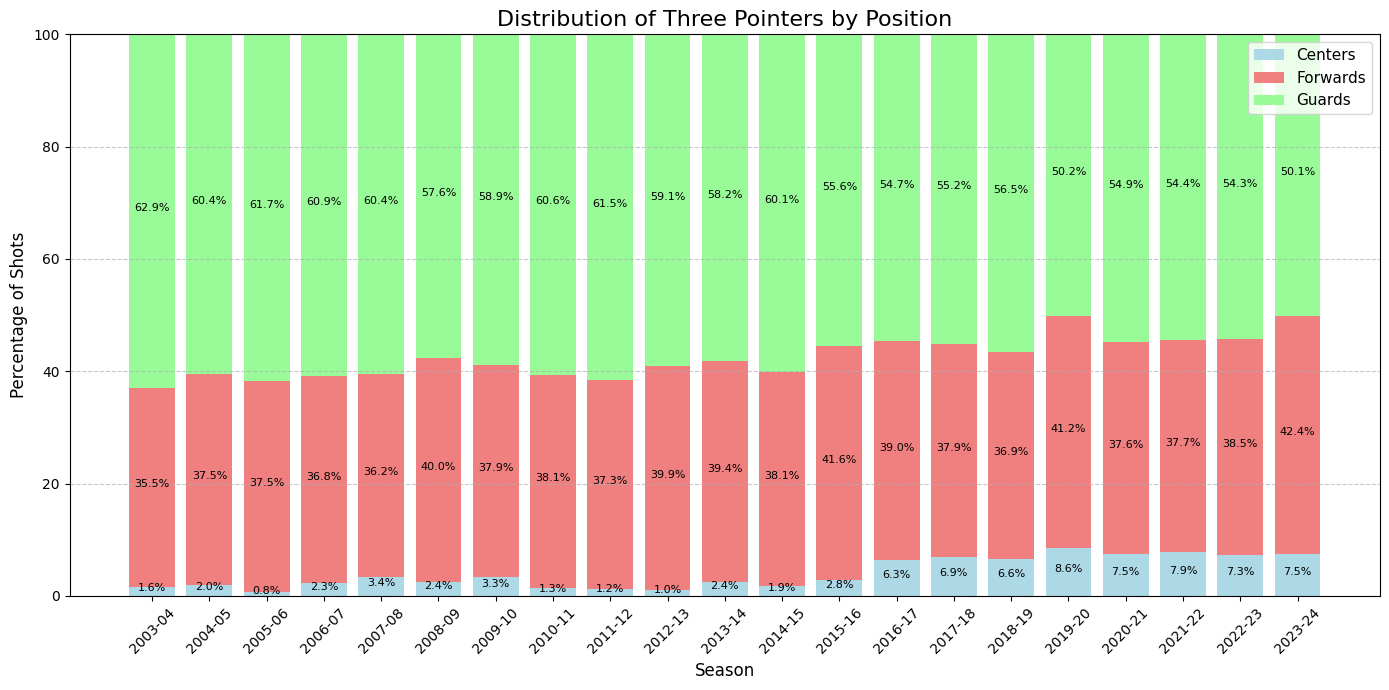

In [38]:
three_pointers_df = df[df['SHOT_TYPE'] == '3PT Field Goal']

three_pointers_distribution = three_pointers_df.groupby('SEASON').agg(
    G_THREE_PT_COUNT=('POSITION_GROUP', lambda x: (x == 'G').sum()),
    F_THREE_PT_COUNT=('POSITION_GROUP', lambda x: (x == 'F').sum()),
    C_THREE_PT_COUNT=('POSITION_GROUP', lambda x: (x == 'C').sum())
).reset_index()

three_pointers_distribution['TOTAL_SHOTS'] = (three_pointers_distribution['G_THREE_PT_COUNT'] +
                                              three_pointers_distribution['F_THREE_PT_COUNT'] +
                                              three_pointers_distribution['C_THREE_PT_COUNT'])

three_pointers_distribution['G_PERCENT'] = (three_pointers_distribution['G_THREE_PT_COUNT'] / three_pointers_distribution['TOTAL_SHOTS'] * 100)
three_pointers_distribution['F_PERCENT'] = (three_pointers_distribution['F_THREE_PT_COUNT'] / three_pointers_distribution['TOTAL_SHOTS'] * 100)
three_pointers_distribution['C_PERCENT'] = (three_pointers_distribution['C_THREE_PT_COUNT'] / three_pointers_distribution['TOTAL_SHOTS'] * 100)

plt.figure(figsize=(14, 7))
plt.bar(three_pointers_distribution['SEASON'], three_pointers_distribution['C_PERCENT'], label='Centers', color='lightblue')
plt.bar(three_pointers_distribution['SEASON'], three_pointers_distribution['F_PERCENT'], bottom=three_pointers_distribution['C_PERCENT'], label='Forwards', color='lightcoral')
plt.bar(three_pointers_distribution['SEASON'], three_pointers_distribution['G_PERCENT'], bottom=three_pointers_distribution['C_PERCENT'] + three_pointers_distribution['F_PERCENT'], label='Guards', color='palegreen')
plt.title('Distribution of Three Pointers by Position', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Percentage of Shots', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(three_pointers_distribution)):
    season = three_pointers_distribution['SEASON'].iloc[i]
    c_height = three_pointers_distribution['C_PERCENT'].iloc[i] / 2
    f_height = three_pointers_distribution['C_PERCENT'].iloc[i] + (three_pointers_distribution['F_PERCENT'].iloc[i] / 2)
    g_height = (
        three_pointers_distribution['C_PERCENT'].iloc[i] + 
        three_pointers_distribution['F_PERCENT'].iloc[i] + 
        (three_pointers_distribution['G_PERCENT'].iloc[i] / 2)
    )

    plt.text(season, c_height, f"{three_pointers_distribution['C_PERCENT'].iloc[i]:.1f}%", ha='center', fontsize=8)
    plt.text(season, f_height, f"{three_pointers_distribution['F_PERCENT'].iloc[i]:.1f}%", ha='center', fontsize=8)
    plt.text(season, g_height, f"{three_pointers_distribution['G_PERCENT'].iloc[i]:.1f}%", ha='center', fontsize=8)

plt.legend(loc='upper right', fontsize=11)
plt.tight_layout()
plt.show()

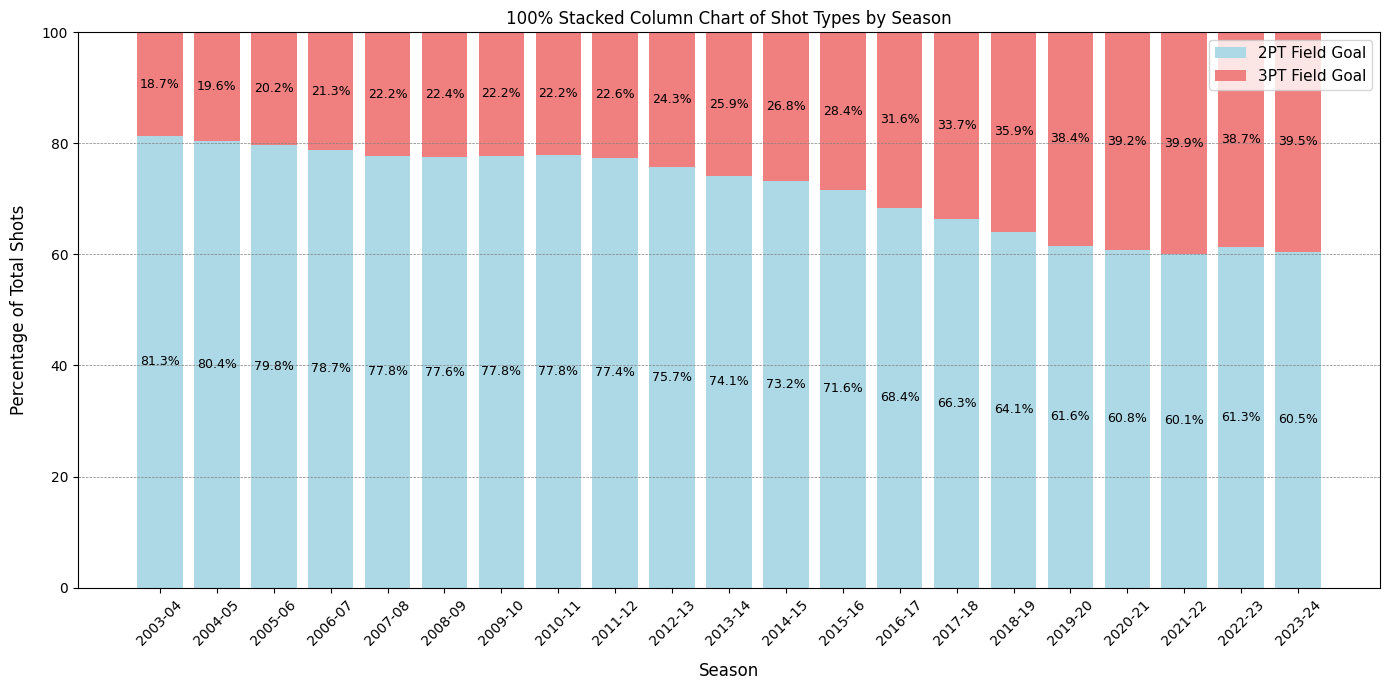

In [39]:
season_shot_stats = df.groupby('SEASON').agg(
    TWO_PT_COUNT=('SHOT_TYPE', lambda x: (x == '2PT Field Goal').sum()), 
    THREE_PT_COUNT=('SHOT_TYPE', lambda x: (x == '3PT Field Goal').sum())
).reset_index()

season_shot_stats['TOTAL_SHOTS'] = season_shot_stats['TWO_PT_COUNT'] + season_shot_stats['THREE_PT_COUNT']
season_shot_stats['TWO_PT_PERCENT'] = season_shot_stats['TWO_PT_COUNT'] / season_shot_stats['TOTAL_SHOTS'] * 100
season_shot_stats['THREE_PT_PERCENT'] = season_shot_stats['THREE_PT_COUNT'] / season_shot_stats['TOTAL_SHOTS'] * 100

plt.figure(figsize=(14, 7))
plt.bar(season_shot_stats['SEASON'], season_shot_stats['TWO_PT_PERCENT'], 
        label='2PT Field Goal', color='lightblue', alpha=1)
plt.bar(season_shot_stats['SEASON'], season_shot_stats['THREE_PT_PERCENT'], 
        bottom=season_shot_stats['TWO_PT_PERCENT'], label='3PT Field Goal', color='lightcoral', alpha=1)
plt.title('100% Stacked Column Chart of Shot Types by Season', fontsize=12)
plt.xlabel('Season', fontsize=12, labelpad=10)
plt.ylabel('Percentage of Total Shots', fontsize=12, labelpad=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 100)
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

for i in range(len(season_shot_stats)):
    plt.text(season_shot_stats['SEASON'].iloc[i], 
             season_shot_stats['TWO_PT_PERCENT'].iloc[i] / 2,
             f"{season_shot_stats['TWO_PT_PERCENT'].iloc[i]:.1f}%", 
             ha='center', va='center', fontsize=9, color='black')
    
    plt.text(season_shot_stats['SEASON'].iloc[i], 
             season_shot_stats['TWO_PT_PERCENT'].iloc[i] + (season_shot_stats['THREE_PT_PERCENT'].iloc[i] / 2),
             f"{season_shot_stats['THREE_PT_PERCENT'].iloc[i]:.1f}%", 
             ha='center', va='center', fontsize=9, color='black')

plt.legend(loc='upper right', fontsize=11)
plt.tight_layout()
plt.show()